In [87]:
# Cell 1: Load data & filter to GMM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated metrics CSV
agg = pd.read_csv("aggregated_metrics.csv")

# Filter to only the GMM model
gmm = agg[agg["model"] == "GMM"].set_index("group")

# Display the full GMM metrics table
display(gmm[["tp", "fp", "fn", "tn", "precision", "recall", "f1", "accuracy"]])


,tp,fp,fn,tn,precision,recall,f1,accuracy
group,,,,,,,,
Variant - Two clearly separated peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Strong overlap between two peaks,2,0,3,0,1.00,0.4,0.57,0.40
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9,0.83,1.0,0.91,0.93
Variant - Cluster of 3 overlapping peaks,5,0,0,0,1.00,1.0,1.00,1.00
Variant - Close but not overlapping peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Intense + weak overlap,1,0,4,5,1.00,0.2,0.33,0.60
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10,0.00,0.0,0.00,0.50


In [88]:
# Cell 2: Table 4.2 – Confusion matrix counts for GMM
# (This will be your Table 4.2 in the paper)
confusion = gmm[["tp", "fp", "fn", "tn"]]
print("Table 4.2: GMM Confusion Matrix by Variant Group\n")
display(confusion)




Table 4.2: GMM Confusion Matrix by Variant Group



,tp,fp,fn,tn
group,,,,
Variant - Two clearly separated peaks,0,0,0,10
Variant - Strong overlap between two peaks,2,0,3,0
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9
Variant - Cluster of 3 overlapping peaks,5,0,0,0
Variant - Close but not overlapping peaks,0,0,0,10
Variant - Intense + weak overlap,1,0,4,5
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10


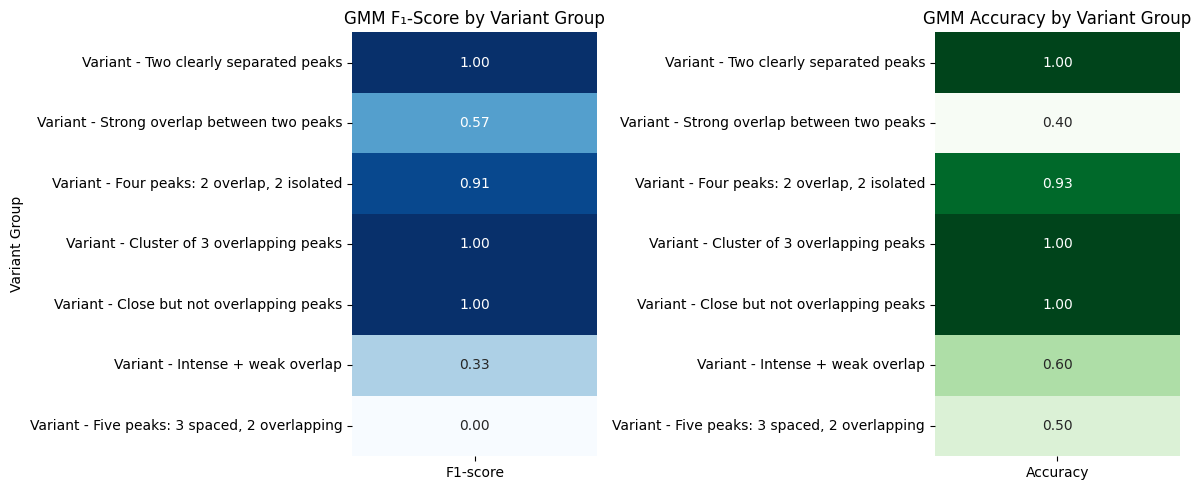

In [89]:
# Cell 3: Figure 4.2 – Heatmaps of F1-score and Accuracy for GMM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# F1‐score heatmap
sns.heatmap(
    gmm[["f1"]].rename(columns={"f1": "F1-score"}),
    annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax1
)
ax1.set_title("GMM F₁-Score by Variant Group")
ax1.set_xlabel("")
ax1.set_ylabel("Variant Group")

# Accuracy heatmap
sns.heatmap(
    gmm[["accuracy"]].rename(columns={"accuracy": "Accuracy"}),
    annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=ax2
)
ax2.set_title("GMM Accuracy by Variant Group")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


In [90]:
# %%
# 4.3.2.2 GMM‐Only Summary Statistics: Mean ± SD of Errors

# compute mean and std for count_error
stats_pc = (
    pc
    .groupby("group")["count_error"]
    .agg(mean_count_error="mean", std_count_error="std")
)

# compute mean and std for mean_loc_error
stats_le = (
    le
    .groupby("group")["mean_loc_error"]
    .agg(mean_loc_error="mean", std_loc_error="std")
)

# merge into a single summary table
stats_summary = stats_pc.join(stats_le)

# display table
stats_summary

,mean_count_error,std_count_error,mean_loc_error,std_loc_error
group,,,,
Variant - Close but not overlapping peaks,1.000000,0.000000,0.000572,0.000507
Variant - Cluster of 3 overlapping peaks,0.000000,0.000000,0.008839,0.001553
"Variant - Five peaks: 3 spaced, 2 overlapping",0.750000,0.444262,0.001934,0.002501
"Variant - Four peaks: 2 overlap, 2 isolated",0.666667,0.487950,0.002465,0.002504
Variant - Intense + weak overlap,1.300000,0.674949,0.013759,0.013982
Variant - Strong overlap between two peaks,1.200000,1.095445,0.027970,0.013436
Variant - Two clearly separated peaks,1.000000,0.000000,0.000396,0.000262


group
Variant - Close but not overlapping peaks        1.000000
Variant - Cluster of 3 overlapping peaks         0.000000
Variant - Five peaks: 3 spaced, 2 overlapping    0.750000
Variant - Four peaks: 2 overlap, 2 isolated      0.666667
Variant - Intense + weak overlap                 1.300000
Variant - Strong overlap between two peaks       1.200000
Variant - Two clearly separated peaks            1.000000
Name: count_error, dtype: float64
group
Variant - Close but not overlapping peaks        0.000000
Variant - Cluster of 3 overlapping peaks         0.000000
Variant - Five peaks: 3 spaced, 2 overlapping    0.444262
Variant - Four peaks: 2 overlap, 2 isolated      0.487950
Variant - Intense + weak overlap                 0.674949
Variant - Strong overlap between two peaks       1.095445
Variant - Two clearly separated peaks            0.000000
Name: count_error, dtype: float64


C:\Users\victo\AppData\Local\Temp\ipykernel_1136\3103777112.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


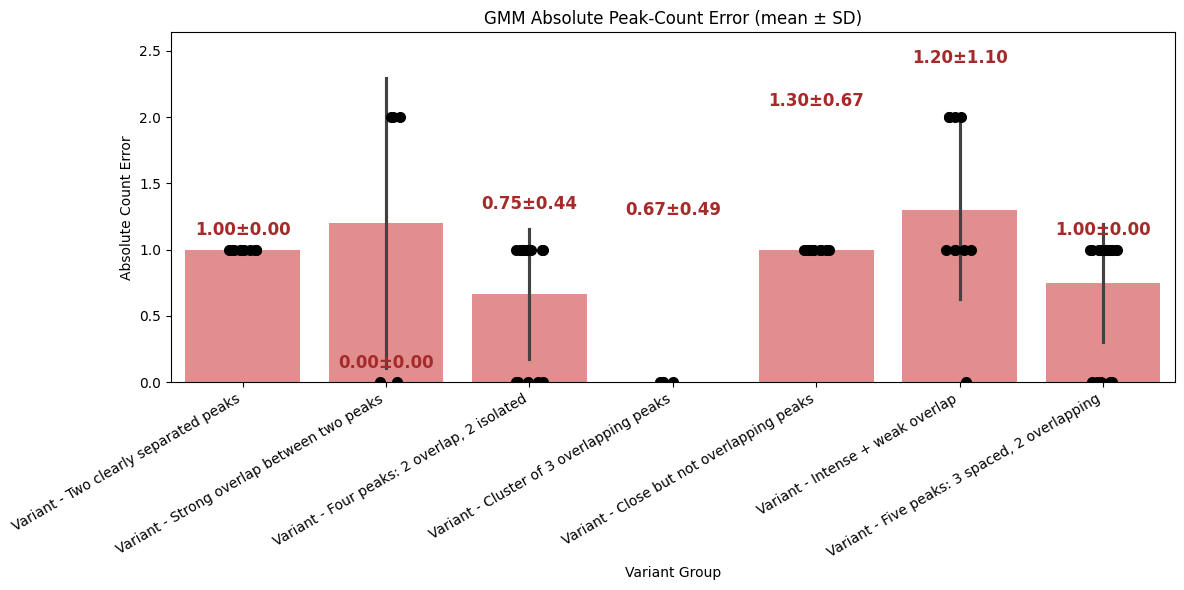

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load per‑region metrics
region = pd.read_csv("region_results_full.csv")
gmm_pc = region[(region["model"] == "GMM") & region["count_error"].notna()]

# Calculate means and stds per group for annotation and bar height
means = gmm_pc.groupby("group")["count_error"].mean()
stds = gmm_pc.groupby("group")["count_error"].std()
groups = means.index.tolist()

print(means)
print(stds)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=gmm_pc,
    x="group",
    y="count_error",
    ci="sd",
    color="lightcoral"
)
sns.stripplot(
    data=gmm_pc,
    x="group",
    y="count_error",
    color="black",
    size=8,
    jitter=True
)

# Dynamically adjust y-limit to leave space above the highest error bar
ymax = (means + stds).max() * 1.15
ax.set_ylim(0, ymax)

# Annotate above each bar, always within the figure
for i, group in enumerate(groups):
    m = means[group]
    s = stds[group]
    # Position annotation just above error bar, but inside the axis
    text_y = min(m + s + ymax * 0.03, ymax * 0.98)
    ax.text(
        i,
        text_y,
        f"{m:.2f}±{s:.2f}",
        ha="center",
        va="bottom",
        color="brown",
        fontweight="bold",
        fontsize=12
    )

ax.set_title("GMM Absolute Peak‑Count Error (mean ± SD)")
ax.set_ylabel("Absolute Count Error")
ax.set_xlabel("Variant Group")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_1136\2094245864.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python3

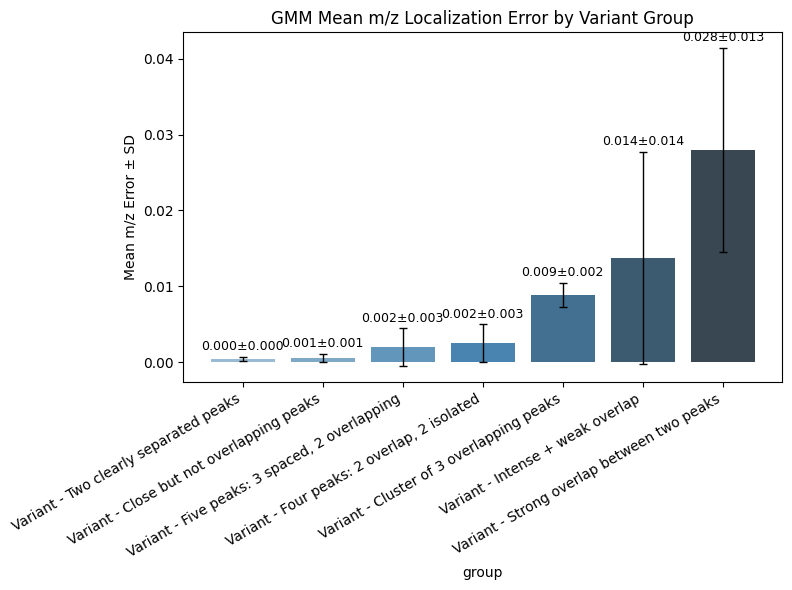

In [92]:
# %% 
# 4.3.2.2 GMM m/z Localization Error: ordered bars + mean±SD annotations

import matplotlib.pyplot as plt
import seaborn as sns

# select only the GMM rows where we computed a mean_loc_error
le = region[(region.model=="GMM") & region.mean_loc_error.notna()]

# compute summary for annotation and ordering
summary_le = le.groupby("group")["mean_loc_error"].agg(["mean","std"]).sort_values("mean")
order_le   = summary_le.index.tolist()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=summary_le.reset_index(),
    x="group",
    y="mean",
    order=order_le,
    palette="Blues_d"
)
# add errorbars by hand
for i, (_, row) in enumerate(summary_le.iterrows()):
    ax.errorbar(
        i, row["mean"], 
        yerr=row["std"], 
        color="k", 
        capsize=3, 
        lw=1
    )
    # annotate mean±SD
    ax.text(
        i, row["mean"] + row["std"] + 0.0005, 
        f"{row['mean']:.3f}±{row['std']:.3f}", 
        ha="center", va="bottom", fontsize=9
    )

plt.title("GMM Mean m/z Localization Error by Variant Group")
plt.ylabel("Mean m/z Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [93]:
groups = [tick.get_text() for tick in ax.get_xticklabels()]
means = le.groupby("group")["mean_loc_error"].mean().reindex(groups)
stds  = le.groupby("group")["mean_loc_error"].std().reindex(groups)

print("GROUP LABELS:", groups)
print("MEANS:", means.values)
print("STDS:", stds.values)

for i, (group, m, s) in enumerate(zip(groups, means, stds)):
    print(f"{group}: mean={m}, std={s}")
    if pd.notnull(m) and pd.notnull(s):
        ax.text(
            i,
            m + s + 0.001,
            f"{m:.3f}±{s:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )


GROUP LABELS: ['Variant - Two clearly separated peaks', 'Variant - Close but not overlapping peaks', 'Variant - Five peaks: 3 spaced, 2 overlapping', 'Variant - Four peaks: 2 overlap, 2 isolated', 'Variant - Cluster of 3 overlapping peaks', 'Variant - Intense + weak overlap', 'Variant - Strong overlap between two peaks']
MEANS: [0.00039555 0.00057163 0.00193383 0.00246513 0.00883938 0.01375895
 0.02796971]
STDS: [0.00026196 0.00050718 0.00250064 0.0025042  0.001553   0.01398203
 0.01343622]
Variant - Two clearly separated peaks: mean=0.00039555230796107404, std=0.00026196068224518026
Variant - Close but not overlapping peaks: mean=0.0005716255797693342, std=0.0005071843806219014
Variant - Five peaks: 3 spaced, 2 overlapping: mean=0.00193382802745669, std=0.002500637764276036
Variant - Four peaks: 2 overlap, 2 isolated: mean=0.0024651296763683133, std=0.002504203485169811
Variant - Cluster of 3 overlapping peaks: mean=0.00883937525042022, std=0.0015529993995651858
Variant - Intense + we

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


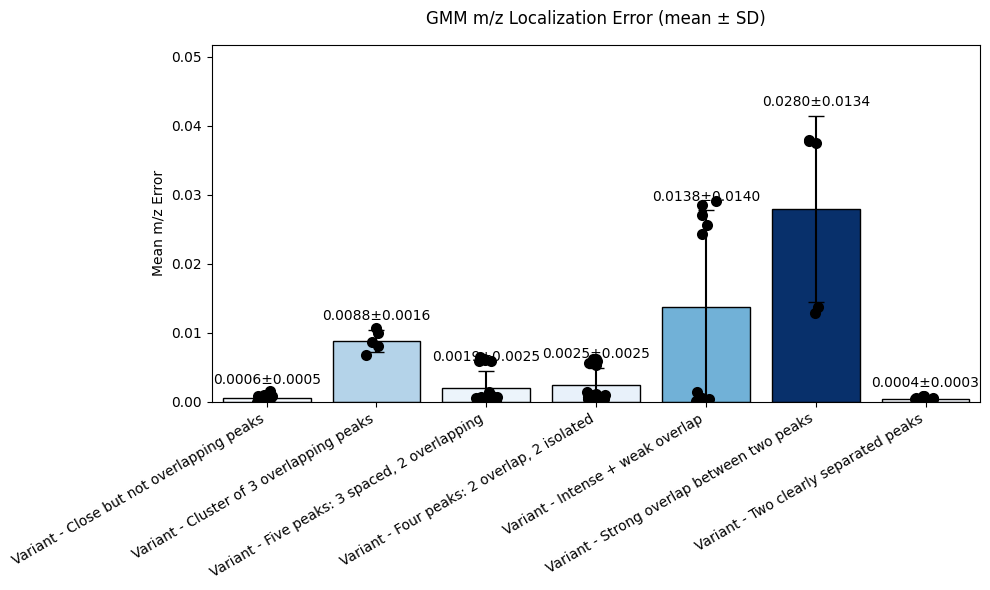

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
gmm_le = region[(region["model"] == "GMM") & region["mean_loc_error"].notna()]

# Compute means and stds per group
means = gmm_le.groupby("group")["mean_loc_error"].mean()
stds  = gmm_le.groupby("group")["mean_loc_error"].std()
groups = means.index.tolist()

# Normalize means for color mapping
norm = mpl.colors.Normalize(vmin=means.min(), vmax=means.max())
cmap = mpl.cm.Blues
colors = cmap(norm(means.values))

# Barplot: use colors per bar
bars = plt.bar(
    groups,
    means,
    yerr=stds,
    capsize=6,
    color=colors,
    edgecolor="black"
)

# Overlay raw points (stripplot)
sns.stripplot(
    data=gmm_le,
    x="group",
    y="mean_loc_error",
    color="black",
    size=8,
    jitter=True
)

# Annotate mean±SD (handle NaN SDs)
for i, (m, s) in enumerate(zip(means, stds)):
    s_show = 0 if np.isnan(s) else s
    plt.text(
        i,
        m + s_show + 0.001,
        f"{m:.4f}±{s_show:.4f}",
        ha="center", va="bottom", fontsize=10
    )

plt.title("GMM m/z Localization Error (mean ± SD)", pad=15)
plt.xlabel("")
plt.ylabel("Mean m/z Error")
plt.xticks(rotation=30, ha="right")
y_max = (means + stds.replace(np.nan, 0)).max()
plt.ylim(0, y_max * 1.25)
plt.tight_layout()
plt.show()

                                             group  \
33      Variant - Strong overlap between two peaks   
39      Variant - Strong overlap between two peaks   
45     Variant - Four peaks: 2 overlap, 2 isolated   
54     Variant - Four peaks: 2 overlap, 2 isolated   
63     Variant - Four peaks: 2 overlap, 2 isolated   
65     Variant - Four peaks: 2 overlap, 2 isolated   
72     Variant - Four peaks: 2 overlap, 2 isolated   
81     Variant - Four peaks: 2 overlap, 2 isolated   
90        Variant - Cluster of 3 overlapping peaks   
93        Variant - Cluster of 3 overlapping peaks   
96        Variant - Cluster of 3 overlapping peaks   
99        Variant - Cluster of 3 overlapping peaks   
102       Variant - Cluster of 3 overlapping peaks   
135               Variant - Intense + weak overlap   
168  Variant - Five peaks: 3 spaced, 2 overlapping   
180  Variant - Five peaks: 3 spaced, 2 overlapping   
192  Variant - Five peaks: 3 spaced, 2 overlapping   
204  Variant - Five peaks: 3

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


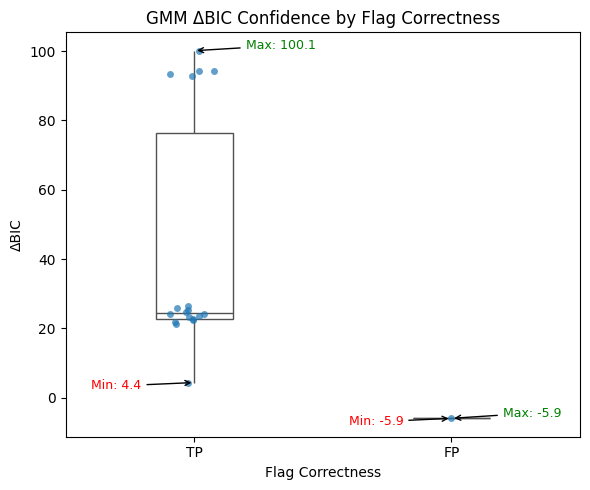

In [ ]:
df = pd.read_csv("region_results_full.csv")

# Only GMM, with non-null confidence and at least predicted an overlap
df_gmm = df[(df["model"] == "GMM") & df["overlap_pred"] & df["confidence"].notna()].copy()

# Label correctness for each row: TP (true positive) or FP (false positive)
df_gmm['correctness'] = np.where(
    (df_gmm['overlap_true']) & (df_gmm['overlap_pred']), "TP",
    np.where((~df_gmm['overlap_true']) & (df_gmm['overlap_pred']), "FP", "Other")
)

plt.figure(figsize=(6, 5))
sns.stripplot(data=df_gmm, x="correctness", y="confidence", jitter=True, alpha=0.7)
sns.boxplot(data=df_gmm, x="correctness", y="confidence", whis=[0, 100], width=0.3, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False)
plt.title("GMM ΔBIC Confidence by Flag Correctness")
plt.xlabel("Flag Correctness")
plt.ylabel("ΔBIC")

# Annotate min and max for each group
for group in df_gmm["correctness"].unique():
    subset = df_gmm[df_gmm["correctness"] == group]
    if subset.empty:
        continue
    x = list(df_gmm["correctness"].unique()).index(group)
    min_idx = subset["confidence"].idxmin()
    max_idx = subset["confidence"].idxmax()
    # Annotate max
    plt.annotate(
        f"Max: {subset.loc[max_idx, 'confidence']:.1f}",
        xy=(x, subset.loc[max_idx, "confidence"]),
        xytext=(x+0.2, subset.loc[max_idx, "confidence"]+0.5),
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9, color='green'
    )
    # Annotate min
    plt.annotate(
        f"Min: {subset.loc[min_idx, 'confidence']:.1f}",
        xy=(x, subset.loc[min_idx, "confidence"]),
        xytext=(x-0.4, subset.loc[min_idx, "confidence"]-2),
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9, color='red'
    )

plt.tight_layout()
plt.show()

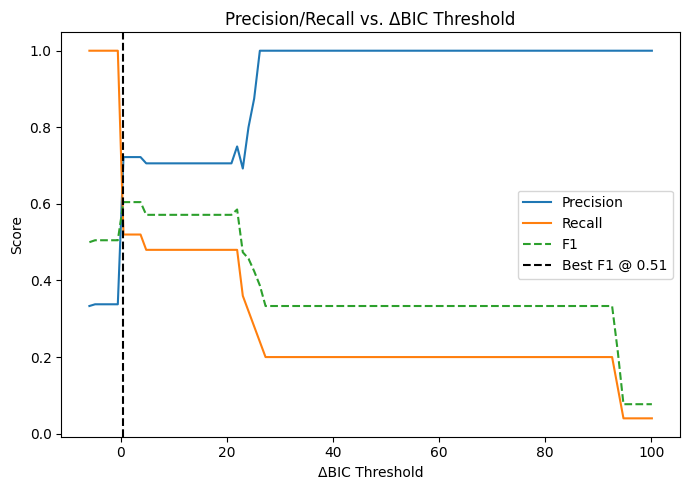

Best F1 = 0.60 at ΔBIC threshold 0.51


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_gmm = df[df["model"] == "GMM"].copy()
df_gmm = df_gmm[df_gmm["confidence"].notna()]

# Only consider regions that are "overlap_true" or "overlap_pred" (optional, or just keep all)
thresholds = np.linspace(df_gmm['confidence'].min(), df_gmm['confidence'].max(), 100)
precision, recall, f1 = [], [], []

for t in thresholds:
    pred = (df_gmm['confidence'] >= t)
    tp = ((pred) & (df_gmm['overlap_true'])).sum()
    fp = ((pred) & (~df_gmm['overlap_true'])).sum()
    fn = ((~pred) & (df_gmm['overlap_true'])).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    rec = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    precision.append(prec)
    recall.append(rec)
    f1.append(2*prec*rec/(prec+rec) if prec+rec>0 else np.nan)

# Find optimal threshold (max F1)
f1 = np.array(f1)
best_idx = np.nanargmax(f1)
best_t = thresholds[best_idx]

plt.figure(figsize=(7, 5))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1, '--', label="F1")
plt.axvline(best_t, color="k", ls="--", label=f"Best F1 @ {best_t:.2f}")
plt.xlabel("ΔBIC Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. ΔBIC Threshold")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best F1 = {f1[best_idx]:.2f} at ΔBIC threshold {best_t:.2f}")


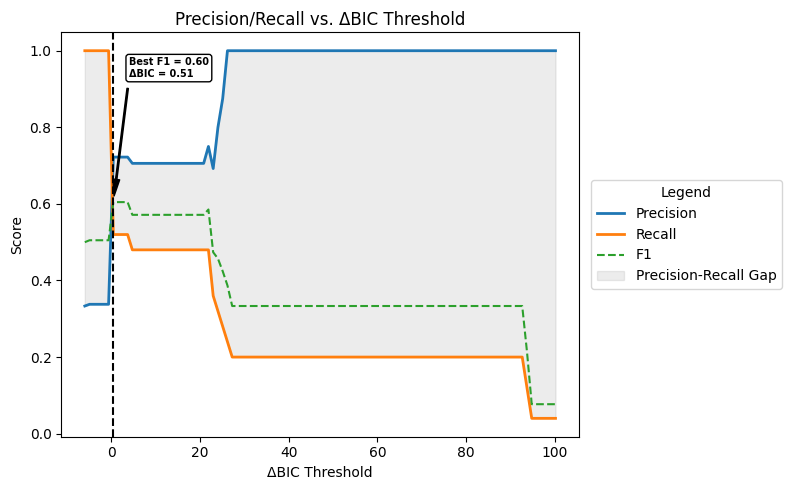

In [ ]:
# Find best F1 and corresponding threshold
f1 = 2 * np.array(precision) * np.array(recall) / (np.array(precision) + np.array(recall) + 1e-10)
best_idx = np.argmax(f1)
best_f1 = f1[best_idx]
best_threshold = thresholds[best_idx]
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision, label='Precision', lw=2)
plt.plot(thresholds, recall, label='Recall', lw=2)
plt.plot(thresholds, f1, label='F1', linestyle="--", lw=1.5)
plt.fill_between(thresholds, precision, recall, color='gray', alpha=0.15, label='Precision-Recall Gap')

plt.axvline(x=best_threshold, color='k', linestyle='dashed')
plt.annotate(
    f"Best F1 = {best_f1:.2f}\nΔBIC = {best_threshold:.2f}",
    xy=(best_threshold, best_f1),                # arrow points to this
    xytext=(best_threshold + 3.5, best_f1 + 0.35), # this is the new text position (tweak as needed)
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
    fontsize=7,
    ha='left', va='center', weight='bold', color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1,)
)

plt.xlabel("ΔBIC Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. ΔBIC Threshold")
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=True,
    title='Legend'
)
plt.tight_layout(rect=[0,0,0.75,1])  # Make room on the right

plt.tight_layout()
plt.show()



In [ ]:
# %% 
# Compute the GMM confusion‐matrix and summary metrics by high‐level scenario class

import pandas as pd

# 1) Load your per‐variant aggregated metrics
agg = pd.read_csv("aggregated_metrics.csv")

# 2) Strip the "Variant - " prefix to get bare group names
agg["base_group"] = agg["group"].str.replace(r"^Variant -\s*", "", regex=True)

# 3) Define the mapping to high‐level scenario classes
scenario_map = {
    "Two clearly separated peaks":        "Fully Separated",
    "Close but not overlapping peaks":     "Fully Separated",
    "Cluster of 3 overlapping peaks":      "Weakly Overlapping",
    "Four peaks: 2 overlap, 2 isolated":  "Weakly Overlapping",
    "Strong overlap between two peaks":    "Strongly Overlapping",
    "Intense + weak overlap":             "Asymmetric",
    "Five peaks: 3 spaced, 2 overlapping": "Near-Duplicates"
}
agg["scenario_class"] = agg["base_group"].map(scenario_map)

# 4) Filter to GMM rows only
gmm = agg[agg["model"] == "GMM"]

# 5) Aggregate per scenario_class:
#    sum TP/FP/FN/TN, average F1 and Accuracy
tbl = (
    gmm
    .groupby("scenario_class")
    .agg({
        "tp":       "sum",
        "fp":       "sum",
        "fn":       "sum",
        "tn":       "sum",
        "f1":       "mean",
        "accuracy": "mean"
    })
    .reset_index()
)

# 6) Round the F1 and Accuracy to two decimal places
tbl["f1"] = tbl["f1"].round(2)
tbl["accuracy"] = tbl["accuracy"].round(2)

# 7) Reorder Scenario Classes as desired
order = [
    "Fully Separated",
    "Weakly Overlapping",
    "Strongly Overlapping",
    "Asymmetric",
    "Near-Duplicates"
]
tbl = tbl.set_index("scenario_class").loc[order].reset_index()
tbl


,scenario_class,tp,fp,fn,tn,f1,accuracy
0,Fully Separated,0,0,0,20,1.00,1.00
1,Weakly Overlapping,10,1,0,9,0.96,0.97
2,Strongly Overlapping,2,0,3,0,0.57,0.40
3,Asymmetric,1,0,4,5,0.33,0.60
4,Near-Duplicates,0,5,5,10,0.00,0.50


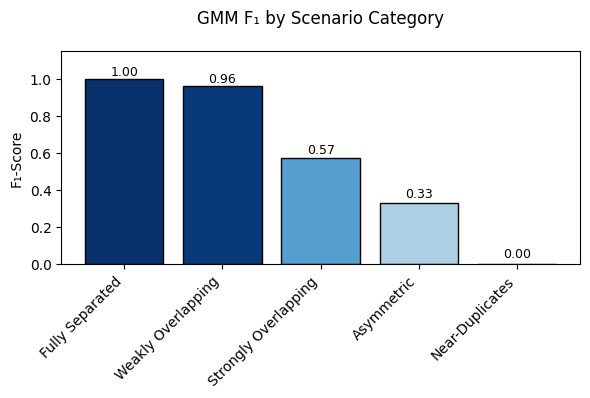

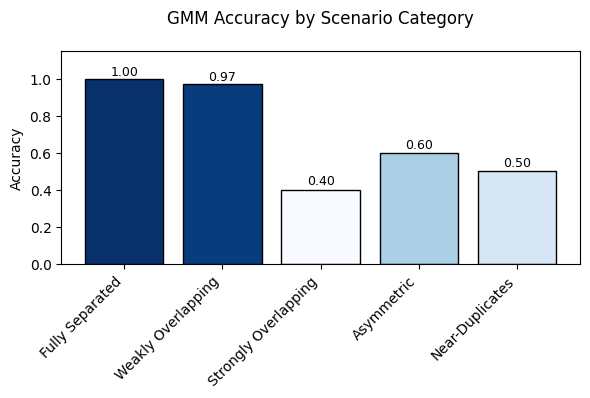

In [ ]:
# %% 
# Color‐mapped, annotated GMM F₁ by Scenario Category

import matplotlib.pyplot as plt
import matplotlib as mpl

# Prepare values and colormap
vals = tbl["f1"].values
norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    vals,
    color=cmap(norm(vals)),
    edgecolor="black"
)

# Extend y‐axis to make room for annotations
ymax = vals.max() * 1.15
plt.ylim(0, ymax)

plt.title("GMM F₁ by Scenario Category", pad=20)
plt.ylabel("F₁-Score")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

# Annotate bar values
for bar, h in zip(bars, vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


# %% 
# Color‐mapped, annotated GMM Accuracy by Scenario Category

acc_vals = tbl["accuracy"].values
norm_acc = mpl.colors.Normalize(vmin=acc_vals.min(), vmax=acc_vals.max())
cmap_acc = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    acc_vals,
    color=cmap_acc(norm_acc(acc_vals)),
    edgecolor="black"
)

ymax_acc = acc_vals.max() * 1.15
plt.ylim(0, ymax_acc)

plt.title("GMM Accuracy by Scenario Category", pad=20)
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

for bar, h in zip(bars, acc_vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax_acc - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
